In this data sample, it should be noticed that there are few "true" numerical values.
For instance, though variable like "1st_Road_Number" is numerical, I cannot input it directly, because there is no intrinsic "increasing trend" in this road code; instead, it just represent different roads.
Actually, many of the variables in this data sample has the same problem, so I managed to transfer them into categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time,datetime


from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn import metrics, datasets, preprocessing

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn import metrics, datasets, preprocessing
from sklearn.model_selection import StratifiedShuffleSplit,ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression, RFE, SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, datasets
from sklearn.preprocessing import OneHotEncoder

import sklearn
import talib
import talib as tb
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn import metrics, datasets, preprocessing
from sklearn.model_selection import StratifiedShuffleSplit,ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union


import scipy.stats as stats
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression, RFE, SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, datasets


D:\Anaconda\Anaconda_Download\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
acc = pd.read_csv('data/accidents_2005_to_2007.csv', header=0)

D:\Anaconda\Anaconda_Download\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
Accident_Index                                 570011 non-null object
Location_Easting_OSGR                          569910 non-null float64
Location_Northing_OSGR                         569910 non-null float64
Longitude                                      569910 non-null float64
Latitude                                       569910 non-null float64
Police_Force                                   570011 non-null int64
Accident_Severity                              570011 non-null int64
Number_of_Vehicles                             570011 non-null int64
Number_of_Casualties                           570011 non-null int64
Date                                           570011 non-null object
Day_of_Week                                    570011 non-null int64
Time                                           569944 non-null object
Local_Authority_(District)                     570

In [4]:
# X = acc.dropna(axis = 1, how = 'any')

In [5]:
# This may lead to inaccuracy in prediction. 
# However, the missing values only account for a little part of the data. 
# Note that there is no missing value in responsive variable. 
acc=acc.fillna(0)

In [6]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
Accident_Index                                 570011 non-null object
Location_Easting_OSGR                          570011 non-null float64
Location_Northing_OSGR                         570011 non-null float64
Longitude                                      570011 non-null float64
Latitude                                       570011 non-null float64
Police_Force                                   570011 non-null int64
Accident_Severity                              570011 non-null int64
Number_of_Vehicles                             570011 non-null int64
Number_of_Casualties                           570011 non-null int64
Date                                           570011 non-null object
Day_of_Week                                    570011 non-null int64
Time                                           570011 non-null object
Local_Authority_(District)                     570

In [7]:
# the data to predict is severely unbalanced.
np.unique(acc["Accident_Severity"])

array([1, 2, 3], dtype=int64)

In [8]:
np.unique(acc["1st_Road_Class"])

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [9]:
acc.Accident_Severity.value_counts()

3    487161
2     74297
1      8553
Name: Accident_Severity, dtype: int64

In [10]:
acc.Number_of_Casualties.value_counts()

1     432213
2      95218
3      26860
4       9718
5       3685
6       1382
7        459
8        201
9         98
10        45
11        33
13        17
12        11
14        10
15         9
16         7
22         7
17         6
19         5
18         4
29         4
20         3
23         3
26         3
45         1
21         1
25         1
28         1
35         1
36         1
40         1
41         1
42         1
68         1
Name: Number_of_Casualties, dtype: int64

In [11]:
acc['casualties']= np.where (acc.Number_of_Casualties >1, 1, 0)
acc.casualties.value_counts()

0    432213
1    137798
Name: casualties, dtype: int64

In [12]:
acc['severity']= np.where (acc.Accident_Severity >1, 1, 0)
acc.severity.value_counts()

1    561458
0      8553
Name: severity, dtype: int64

In [13]:
# Note that the format of date is not YY-MM-DD.
acc["Date"] =pd.to_datetime(acc['Date'], format="%d/%m/%Y")
#acc.set_index('Date', inplace=True)

In [14]:
# Consider the season as the dummy variable in the Regression.
winter_mask = ((acc['Date']>='2004-12-01') & (acc['Date']<='2005-02-28')) | ((acc['Date']>='2005-12-01') & (acc['Date']<='2006-02-28')) | ((acc['Date']>='2006-12-01') & (acc['Date']<='2007-02-28')) | ((acc['Date']>='2007-12-01') & (acc['Date']<='2008-02-29'))
spring_mask = ((acc['Date']>='2005-03-01') & (acc['Date']<='2005-05-31')) | ((acc['Date']>='2006-03-01') & (acc['Date']<='2006-05-31')) | ((acc['Date']>='2007-03-01') & (acc['Date']<='2007-05-31')) | ((acc['Date']>='2008-03-01') & (acc['Date']<='2008-05-31'))
summer_mask = ((acc['Date']>='2005-06-01') & (acc['Date']<='2005-08-31')) | ((acc['Date']>='2006-06-01') & (acc['Date']<='2006-08-31')) | ((acc['Date']>='2007-06-01') & (acc['Date']<='2007-08-31')) | ((acc['Date']>='2008-06-01') & (acc['Date']<='2008-08-31'))
autumn_mask = ((acc['Date']>='2005-09-01') & (acc['Date']<='2005-11-30')) | ((acc['Date']>='2006-09-01') & (acc['Date']<='2006-11-30')) | ((acc['Date']>='2007-09-01') & (acc['Date']<='2007-11-30')) | ((acc['Date']>='2008-09-01') & (acc['Date']<='2008-11-30'))

In [15]:
acc["season"]=np.zeros(acc.shape[0])
acc.loc[spring_mask, 'season'] = 'spring'
acc.loc[summer_mask, 'season'] = 'summer'
acc.loc[autumn_mask, 'season'] = 'autumn'
acc.loc[winter_mask, 'season'] = 'winter'

In [16]:
#tmp = pd.DataFrame({'acc':Road_Type}).to_dict(orient='records')
#bb = DictVectorizer(sparse=False)
#X = bb.fit_transform(tmp)

In [17]:
tmp = acc[['Road_Type','Weather_Conditions','Did_Police_Officer_Attend_Scene_of_Accident',
           'Road_Surface_Conditions','Light_Conditions','Urban_or_Rural_Area','Speed_limit',
           'season']].to_dict(orient='records')
bb = DictVectorizer(sparse=False)
X = bb.fit_transform(tmp)

In [18]:
bb.feature_names_

['Did_Police_Officer_Attend_Scene_of_Accident',
 'Did_Police_Officer_Attend_Scene_of_Accident=No',
 'Did_Police_Officer_Attend_Scene_of_Accident=Yes',
 'Light_Conditions=Darkeness: No street lighting',
 'Light_Conditions=Darkness: Street lighting unknown',
 'Light_Conditions=Darkness: Street lights present and lit',
 'Light_Conditions=Darkness: Street lights present but unlit',
 'Light_Conditions=Daylight: Street light present',
 'Road_Surface_Conditions',
 'Road_Surface_Conditions=Dry',
 'Road_Surface_Conditions=Flood (Over 3cm of water)',
 'Road_Surface_Conditions=Frost/Ice',
 'Road_Surface_Conditions=Snow',
 'Road_Surface_Conditions=Wet/Damp',
 'Road_Type=Dual carriageway',
 'Road_Type=One way street',
 'Road_Type=Roundabout',
 'Road_Type=Single carriageway',
 'Road_Type=Slip road',
 'Road_Type=Unknown',
 'Speed_limit',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Weather_Conditions=Fine with high winds',
 'Weather_Conditions=Fine without high winds',
 'Weather_Conditions=Fog or

In [19]:
X

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [20]:
np.isnan(X).any()

False

In [21]:
pd.crosstab(columns=X[:, -2], index=acc.Accident_Severity)

col_0,0.0,1.0
Accident_Severity,,
1,6398,2155
2,54464,19833
3,364545,122616


In [22]:
table1 = pd.crosstab(columns=X[:, -2], index=acc.Accident_Severity)
_,p_val,dof,exp = stats.chi2_contingency(table1, correction=True)
print('The p-value of the test is {:.5f}.'.format(np.round(p_val, 3)))
# There is significant connection between the seasons and Accident Severity.

The p-value of the test is 0.00000.


In [23]:
pd.crosstab(columns=X[:, 9], index=acc.Accident_Severity)

col_0,0.0,1.0
Accident_Severity,,
1,2834,5719
2,22526,51771
3,154754,332407


In [24]:
table2 = pd.crosstab(columns=X[:, 9], index=acc.Accident_Severity)
_,p_val,dof,exp = stats.chi2_contingency(table2, correction=True)
print('The p-value of the test is {:.5f}.'.format(np.round(p_val, 3)))

The p-value of the test is 0.00000.


In [25]:
y1 = acc.loc[:,['Accident_Severity']]

In [26]:
y2 = acc.loc[:,['Number_of_Casualties']]

In [27]:
y3 = acc.casualties

In [28]:
train_x, test_x, train_y, test_y = train_test_split(X, y3, test_size = 0.3)

In [29]:
scaler = StandardScaler()  
# fit only on training data
scaler.fit(train_x)  
train_x = scaler.transform(train_x)  
# apply same transformation to test data
test_x = scaler.transform(test_x)  

In [30]:
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', verbose=2)
logreg.fit(train_x, train_y.values.ravel())

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

In [31]:
y_hat = logreg.predict(test_x)
r2 = metrics.r2_score(test_y.values.ravel(),y_hat)
mse = metrics.mean_squared_error(test_y.values.ravel(),y_hat)
print('The MSE and R2 are',
     '{:.8f} and {:.8f} respectively.'.format(mse, r2))
print(logreg.score(test_x, test_y.values.ravel()))

The MSE and R2 are 0.24095928 and -0.31745237 respectively.
0.7590407241935861


In [32]:
np.unique(y_hat)

array([0])

In [33]:
# neural_network
# Multi-layer Perceptron classifier

In [34]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1000,
                 hidden_layer_sizes=(12, 9), random_state=1)

In [35]:
clf2.fit(train_x, train_y.values.ravel())

MLPClassifier(activation='relu', alpha=1000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [36]:
pred1 = clf2.predict(train_x)
pred2 = clf2.predict(test_x)
print(accuracy_score(pred1, train_y.values.ravel()), accuracy_score(pred2, test_y.values.ravel()))

0.7579165277802143 0.7590407241935861


In [37]:
np.unique(pred1)

array([0])

In [38]:
np.unique(pred2)

array([0])

In [39]:
# To see whether there is any problem with the model itself.

In [40]:
y0= X[:, 5]
train_x, test_x, train_y0, test_y0 = train_test_split(X, y0, test_size = 0.3)
scaler = StandardScaler()  
# fit only on training data
scaler.fit(train_x)  
train_x = scaler.transform(train_x)  
# apply same transformation to test data
test_x = scaler.transform(test_x)  

In [41]:
clf2.fit(train_x, train_y0)

MLPClassifier(activation='relu', alpha=1000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [42]:
pred1 = clf2.predict(train_x)
pred2 = clf2.predict(test_x)
print(accuracy_score(pred1, train_y0), accuracy_score(pred2, test_y0))

1.0 1.0


In [43]:
# So the model itself is not wrong.

In [44]:
clf_selected = Pipeline([
  #('feature_selection', SelectFromModel(LinearRegression())),
  ('feature_selection', SelectFromModel(RandomForestClassifier())),
])

In [45]:
clf_selected.fit(train_x, train_y)
selected_train_x = clf_selected.transform(train_x)
clf_selected.transform(train_x)

array([[ 0.49124986,  1.99275155, -1.6287746 , ...,  1.31173453,
        -0.56299893,  1.78446223],
       [-2.035624  , -0.5018187 ,  0.61395849, ..., -0.76069176,
        -0.56299893, -0.56039292],
       [ 0.49124986, -0.5018187 ,  0.61395849, ..., -0.76069176,
        -0.56299893, -0.56039292],
       ...,
       [ 0.49124986, -0.5018187 , -1.6287746 , ...,  1.31173453,
        -0.56299893, -0.56039292],
       [ 0.49124986, -0.5018187 ,  0.61395849, ...,  1.31173453,
        -0.56299893, -0.56039292],
       [ 0.49124986, -0.5018187 ,  0.61395849, ...,  1.31173453,
         1.77620232, -0.56039292]])

In [46]:
train_x.shape
selected_train_x.shape

(399007, 9)

In [47]:
final_mod = RandomForestClassifier()
final_mod.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
selected_test_x = clf_selected.transform (test_x)
clf_selected.transform(test_x)

array([[ 0.49124986, -0.5018187 ,  0.61395849, ..., -0.76069176,
         1.77620232, -0.56039292],
       [ 0.49124986, -0.5018187 ,  0.61395849, ...,  1.31173453,
        -0.56299893,  1.78446223],
       [ 0.49124986, -0.5018187 ,  0.61395849, ...,  1.31173453,
        -0.56299893, -0.56039292],
       ...,
       [ 0.49124986, -0.5018187 ,  0.61395849, ...,  1.31173453,
        -0.56299893, -0.56039292],
       [ 0.49124986, -0.5018187 , -1.6287746 , ...,  1.31173453,
        -0.56299893,  1.78446223],
       [ 0.49124986,  1.99275155, -1.6287746 , ..., -0.76069176,
        -0.56299893, -0.56039292]])

In [49]:
final_mod.fit(selected_test_x, test_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
pred1 = final_mod.predict(selected_train_x)
pred2 = final_mod.predict(selected_test_x)
print(accuracy_score(pred1, train_y), accuracy_score(pred2, test_y))

0.7577335735964532 0.759175223971369


In [51]:
np.unique(pred1)

array([0, 1])

In [52]:
np.unique(pred2)

array([0, 1])

In [53]:
y = acc.severity

In [72]:
tmp = acc[['Road_Type','Weather_Conditions','Did_Police_Officer_Attend_Scene_of_Accident',
           'Road_Surface_Conditions','Light_Conditions','Urban_or_Rural_Area','Speed_limit',
           'season']].to_dict(orient='records')
bb = DictVectorizer(sparse=False)
X = bb.fit_transform(tmp)

In [78]:
X

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [119]:
X=X[ :,[2,20]]

In [120]:
X

array([[ 1., 30.],
       [ 1., 30.],
       [ 1., 30.],
       ...,
       [ 1., 60.],
       [ 0., 30.],
       [ 1., 60.]])

In [121]:
# Both MLPRegressor and MLPClassifier use parameter alpha for regularization (L2 regularization) term 
# which helps in avoiding overfitting by penalizing weights with large magnitudes.

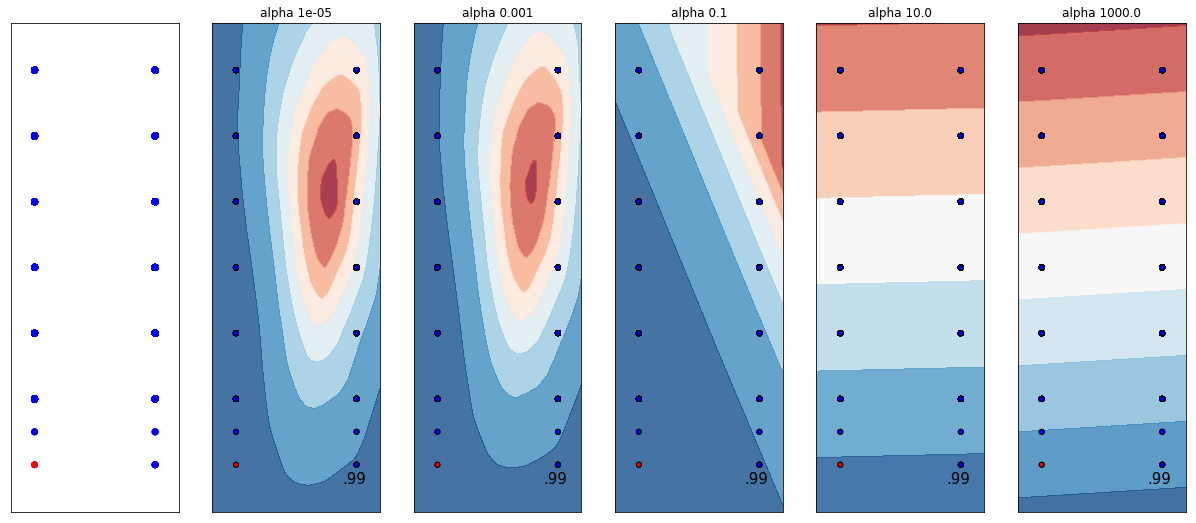

In [122]:
h = .02  # step size in the mesh
alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1,max_iter=2000))


datasets = [(X,y)]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()